# This notebook recreates the plots in the paper

In [8]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plotpar = {'axes.labelsize': 25,
           'font.size': 25,
           'legend.fontsize': 25,
           'xtick.labelsize': 25,
           'ytick.labelsize': 25,
           'text.usetex': True}
plt.rcParams.update(plotpar)

Produce plots for the simulated data.

Load the simulated data set.

In [9]:
df = pd.read_csv("simulated_data.csv")
true_age_gyr = (10**df.age.values)*1e-9

Load samples

In [35]:
savedir = "simulation_results/iso_and_gyro"
meds, stds, age_samps, resids, errp, errm = [], [], [], [], [], []
N = 25

for i in range(N):
    with h5py.File("{0}/{1}.h5".format(savedir, str(i).zfill(4)), "r") as f:  # , "r") as f:
            samples = f["samples"][...]
            age_samps.append((10**samples[:, 1])*1e-9)
            resids.append(list(np.array(age_samps[i]) - true_age_gyr[i]))
            meds.append(np.median(age_samps[i]))
            stds.append(np.std(age_samps[i]))
            upper = np.percentile(age_samps[i], 84)
            lower = np.percentile(age_samps[i], 16)
            errp.append(upper-meds[i])
            errm.append(meds[i]-lower)
meds, stds, errp, errm = np.array(meds), np.array(stds), np.array(errp), np.array(errm)

[17]
[12.21983437]


(0, 14)

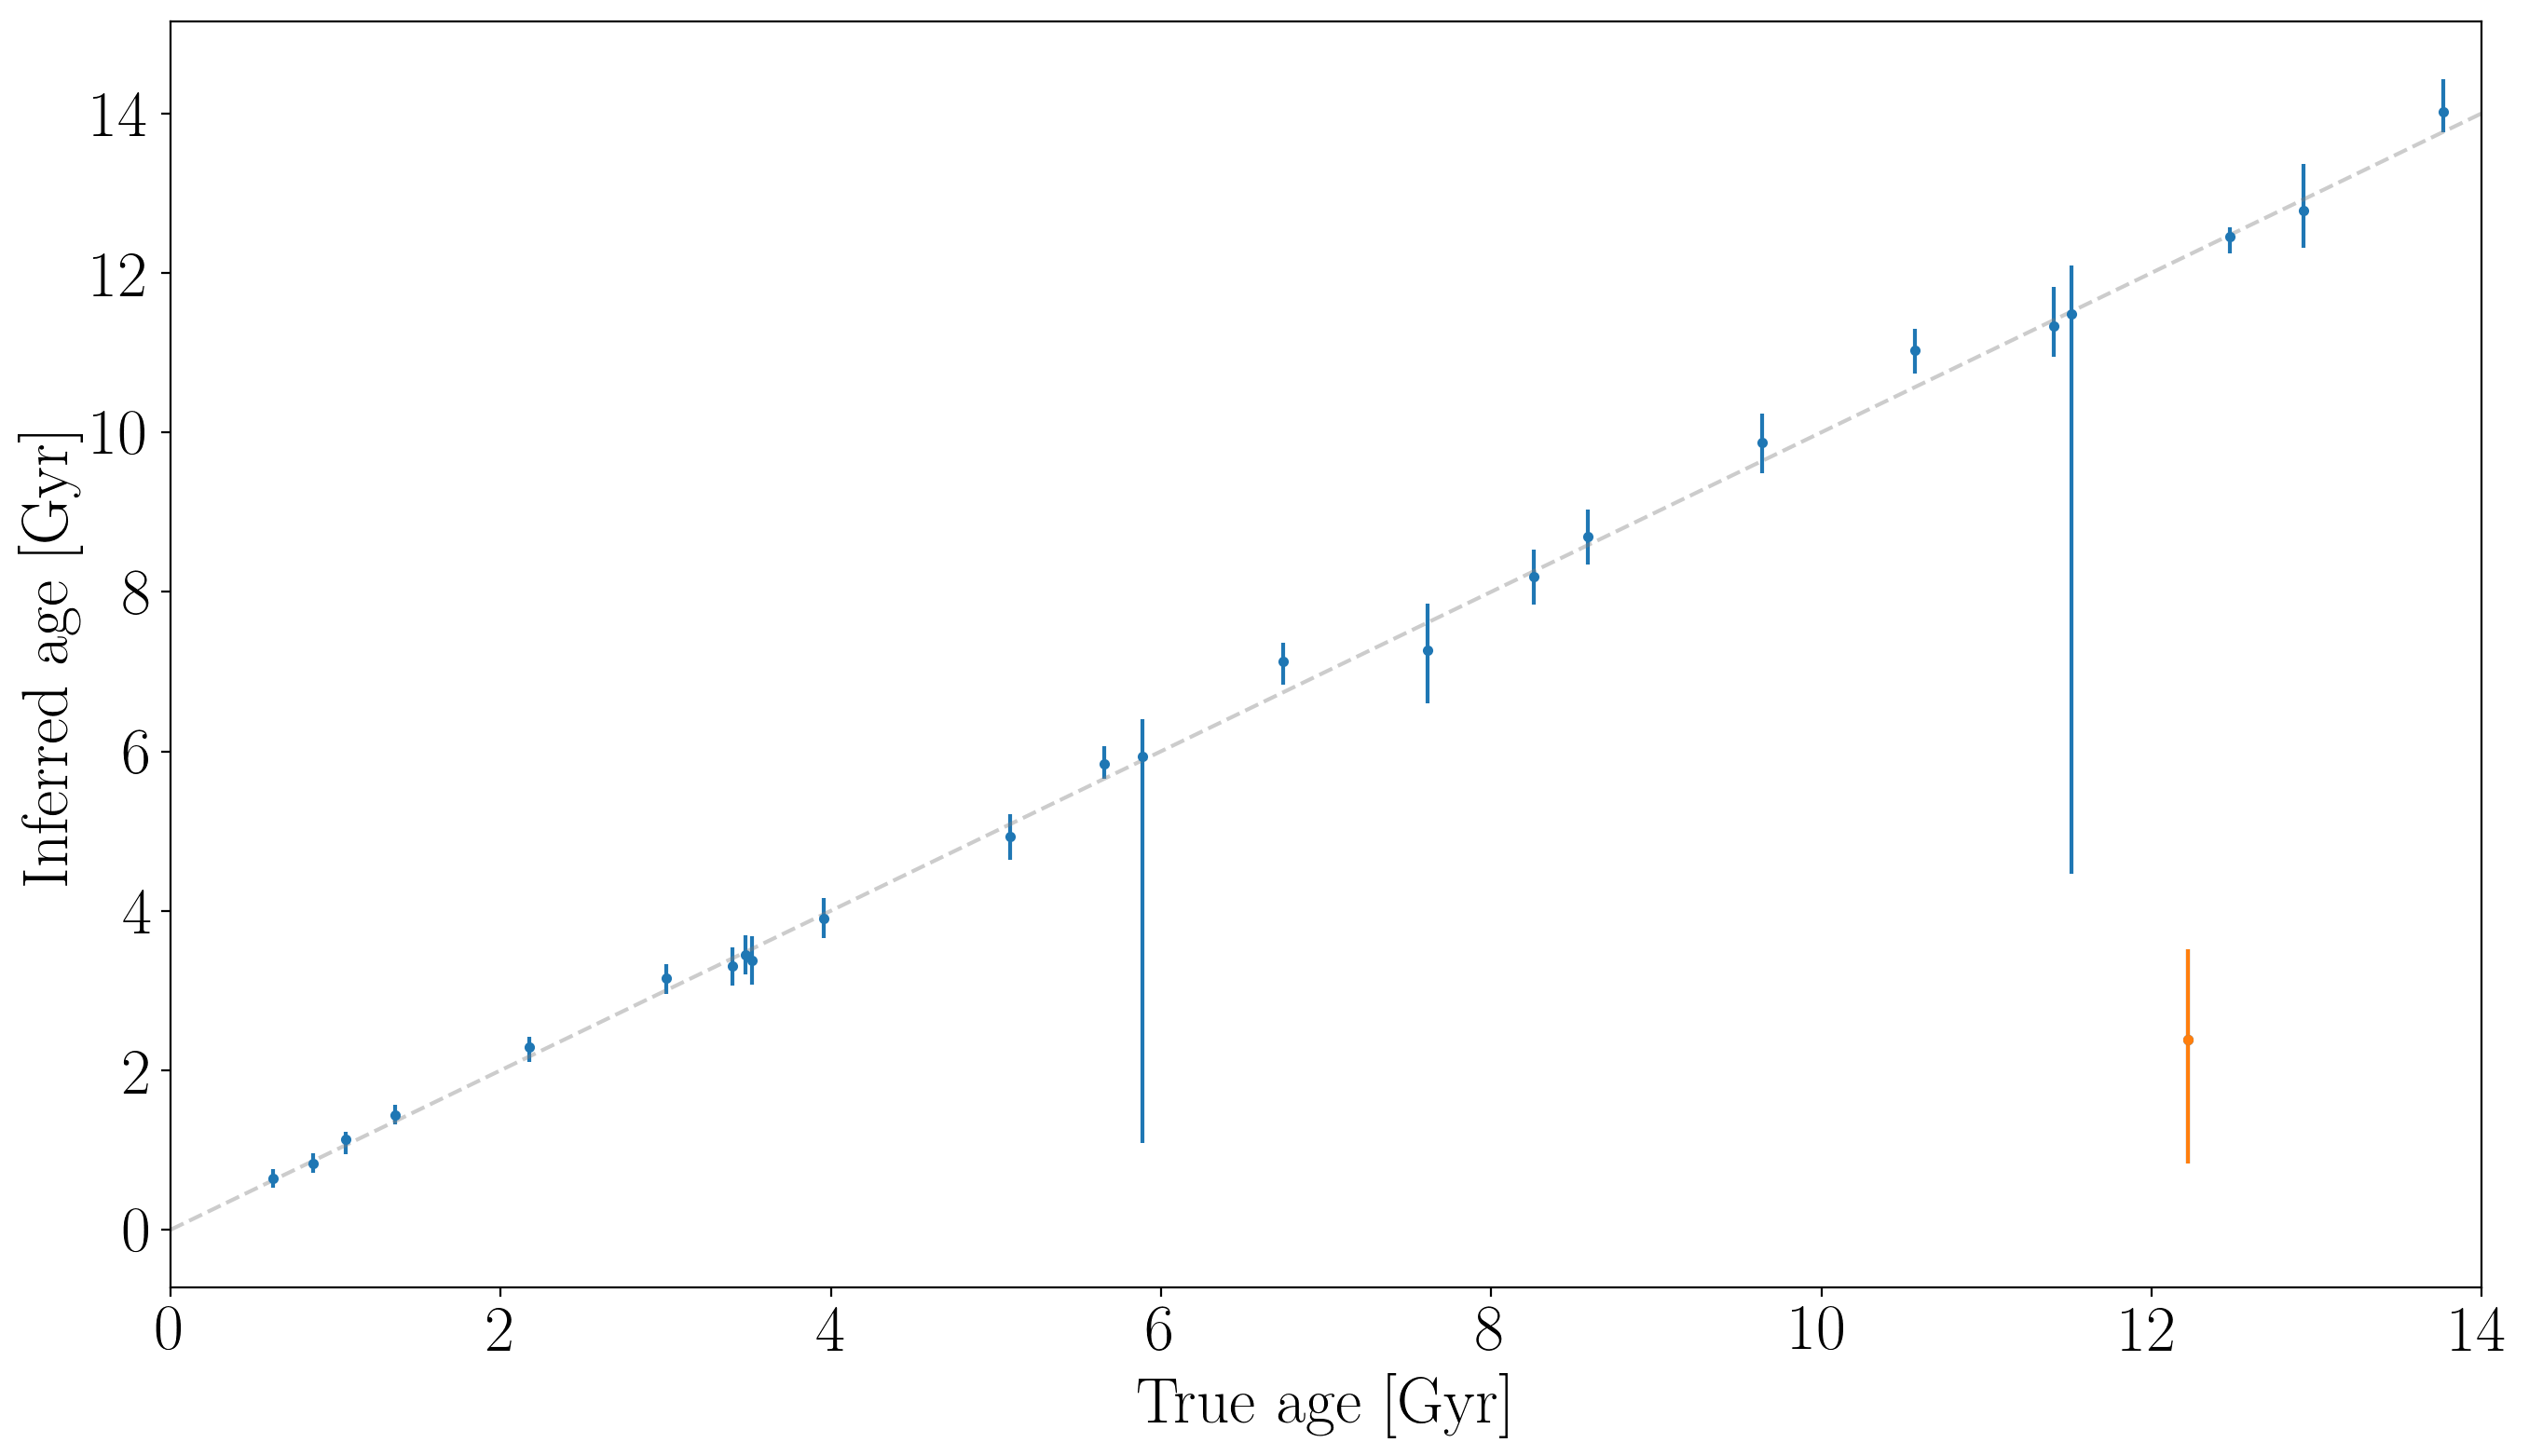

In [36]:
plt.figure(figsize=(16, 9), dpi=200)
plt.errorbar(true_age_gyr[:N], meds, yerr=[errm, errp], fmt=".")

m = meds < true_age_gyr[:N] - .1*true_age_gyr[:N]
print(np.arange(N)[m])
print(true_age_gyr[:N][m])
plt.errorbar(true_age_gyr[:N][m], meds[m], yerr=[errm[m], errp[m]], fmt=".", color="tab:orange")
# plt.errorbar(true_age_gyr[:N][m], meds[m], yerr=stds[m], fmt=".", color="tab:orange")
             
plt.xlabel("$\mathrm{True~age~[Gyr]}$")
plt.ylabel("$\mathrm{Inferred~age~[Gyr]}$")
xs = np.linspace(0, 14, 100)
plt.plot(xs, xs, ".5", ls="--", alpha=.4)
plt.xlim(0, 14)
#plt.savefig("iso_and_gyro.pdf")

(-4, 2)

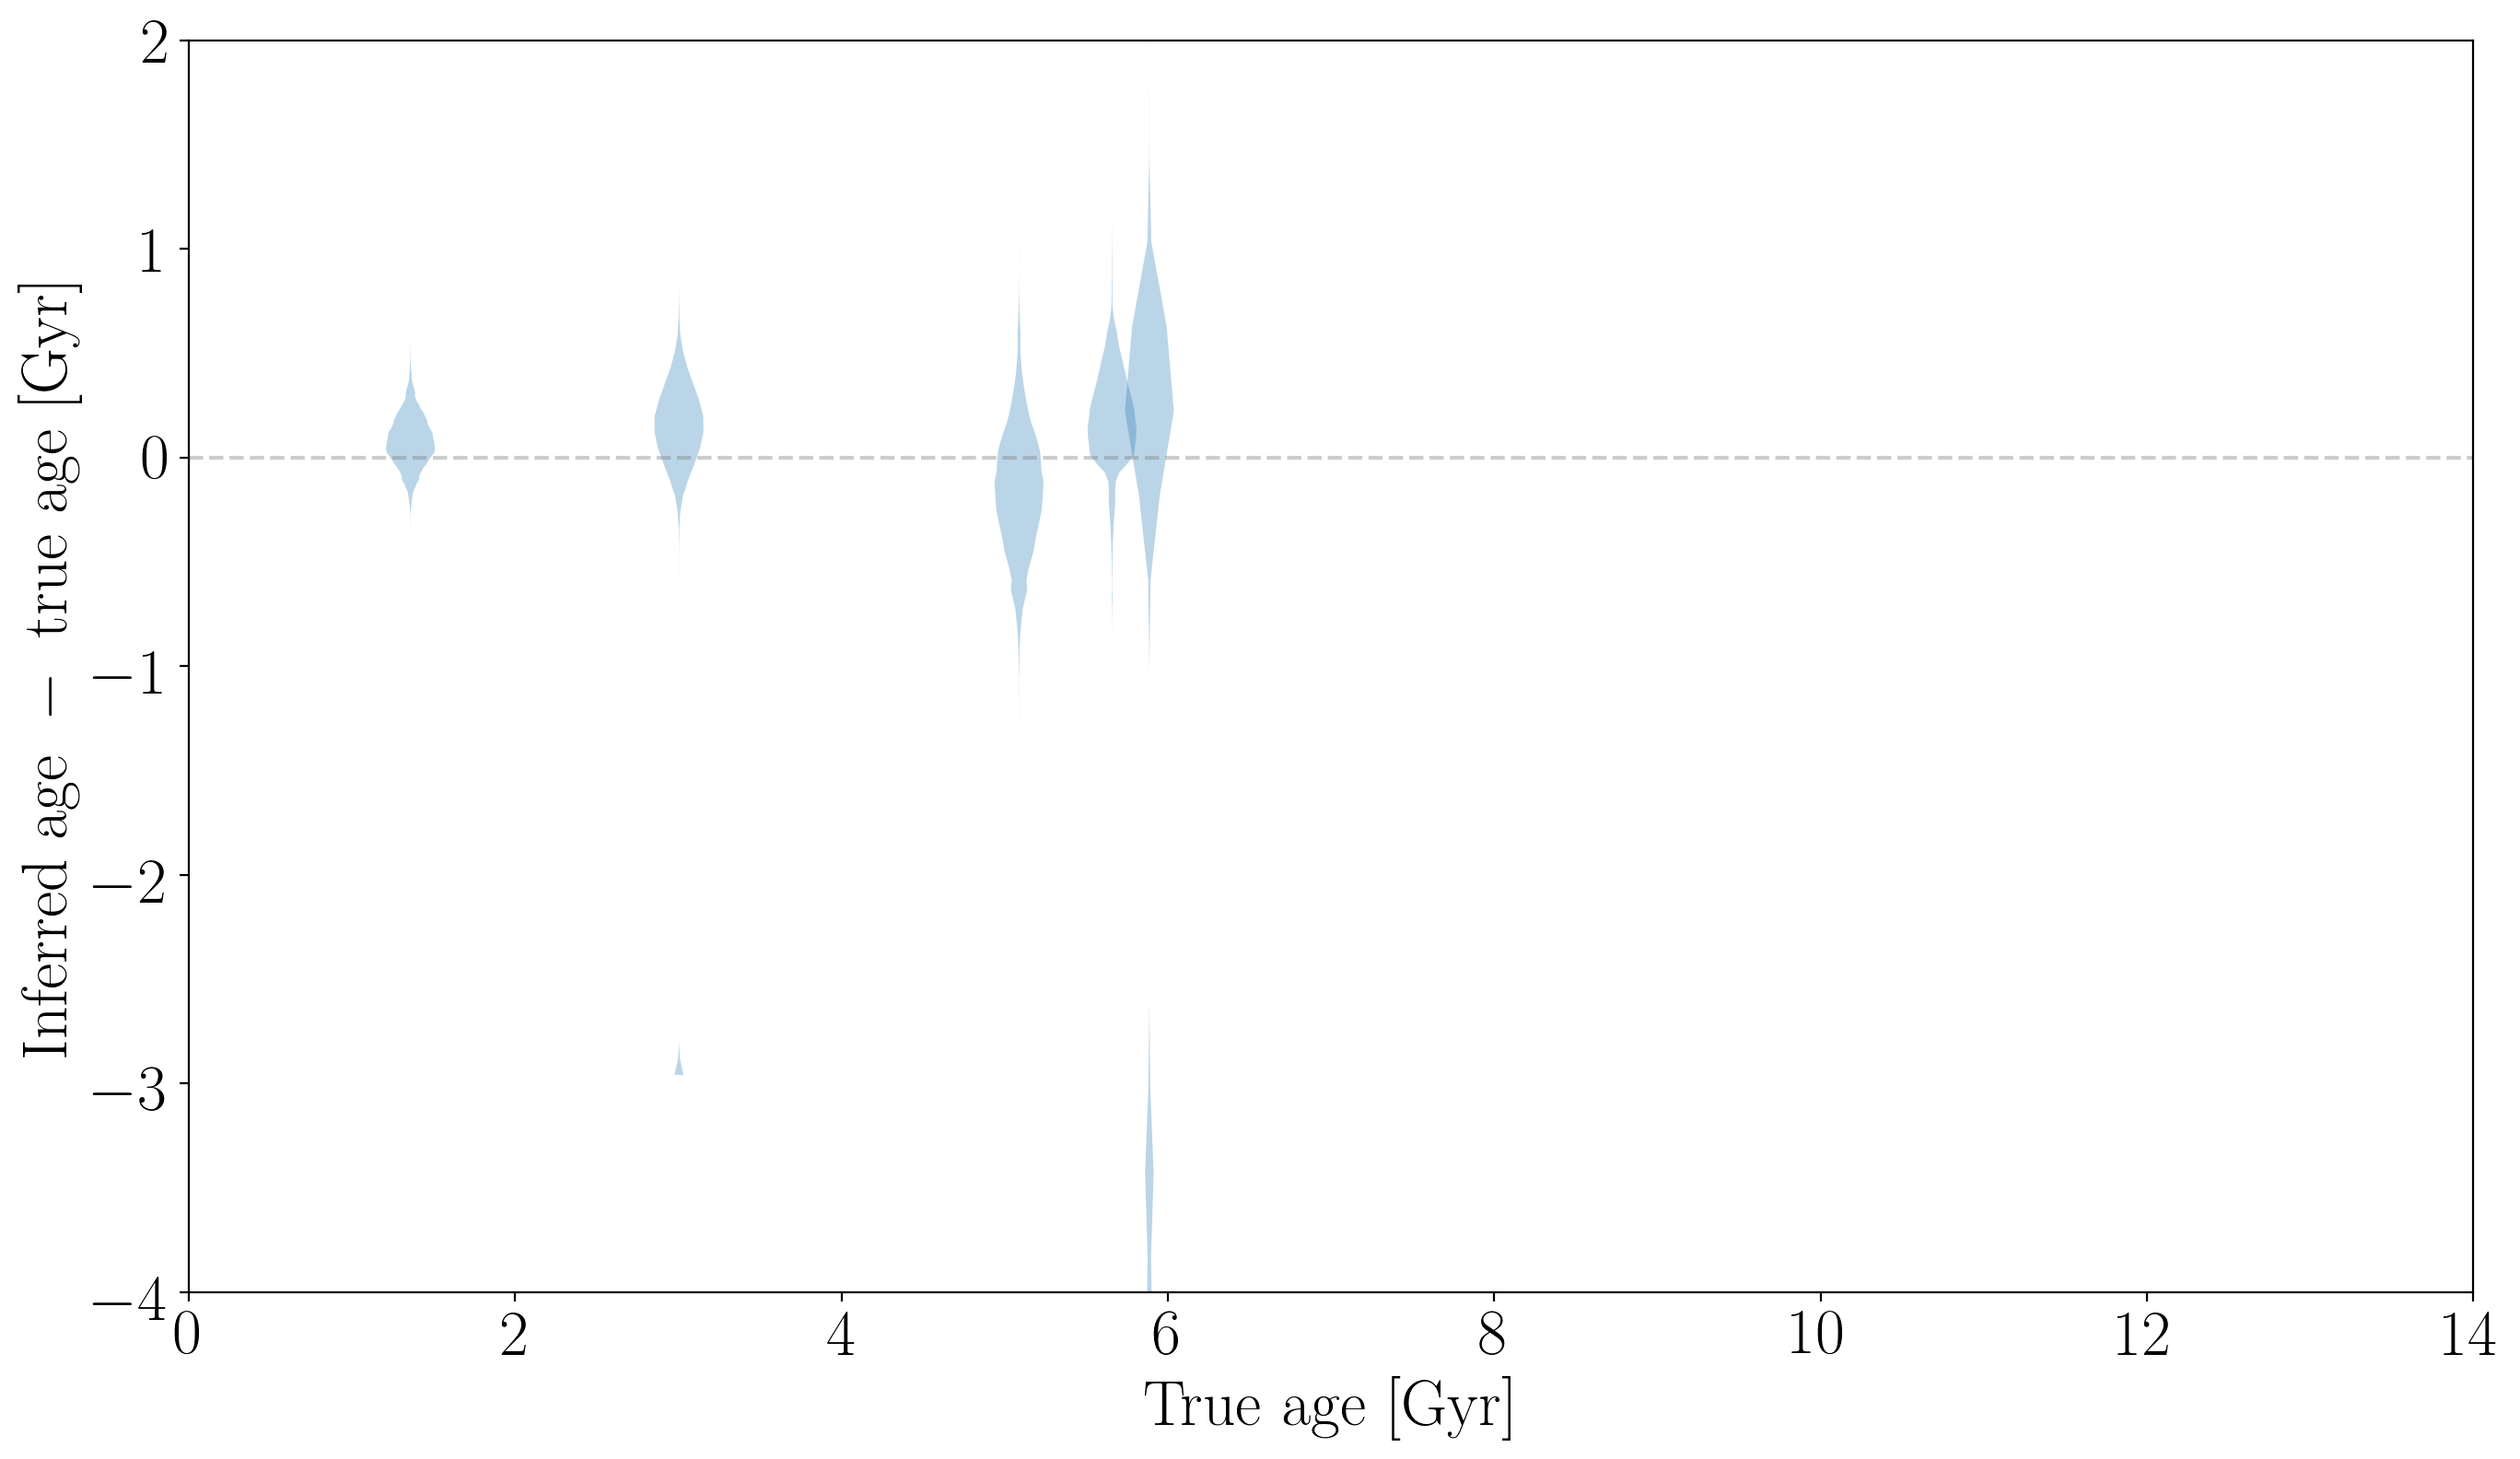

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 9), dpi=200)

axes.violinplot(resids, true_age_gyr[:N], points=50, widths=0.3, 
                showmeans=False, showextrema=False, showmedians=False)
#       age_samps-true_age_gyr[:N]       
plt.xlabel("$\mathrm{True~age~[Gyr]}$")
plt.ylabel("$\mathrm{Inferred~age~-~true~age~[Gyr]}$")
xs = np.linspace(0, 14, 100)
# plt.plot(xs, xs, ".5", ls="--", alpha=.4)
plt.plot(xs, np.zeros(len(xs)), ".5", ls="--", alpha=.4)
plt.xlim(0, 14)
plt.ylim(-4, 2)
#plt.savefig("iso_and_gyro.pdf")

Now just the isochrone model.

In [32]:
savedir = "simulation_results/iso_only"
meds_iso, stds_iso, age_samps_iso, resids_iso, errp, errm = [], [], [], [], [], []
N_iso = 9

for i in range(N_iso):
    with h5py.File("{0}/{1}.h5".format(savedir, str(i).zfill(4)), "r") as f:
            samples_iso = f["samples"][...]
            age_samps_iso.append((10**samples_iso[:, 1])*1e-9)
            resids_iso.append(list(np.array(age_samps_iso[i]) - true_age_gyr[i]))
            meds_iso.append(np.median(age_samps_iso[i]))
            stds_iso.append(np.std(age_samps_iso[i]))
            upper = np.percentile(age_samps_iso[i], 84)
            lower = np.percentile(age_samps_iso[i], 16)
            errp.append(upper)# - meds[i])
            errm.append(lower)
meds_iso, stds_iso = np.array(meds_iso), np.array(stds_iso)

(0, 14)

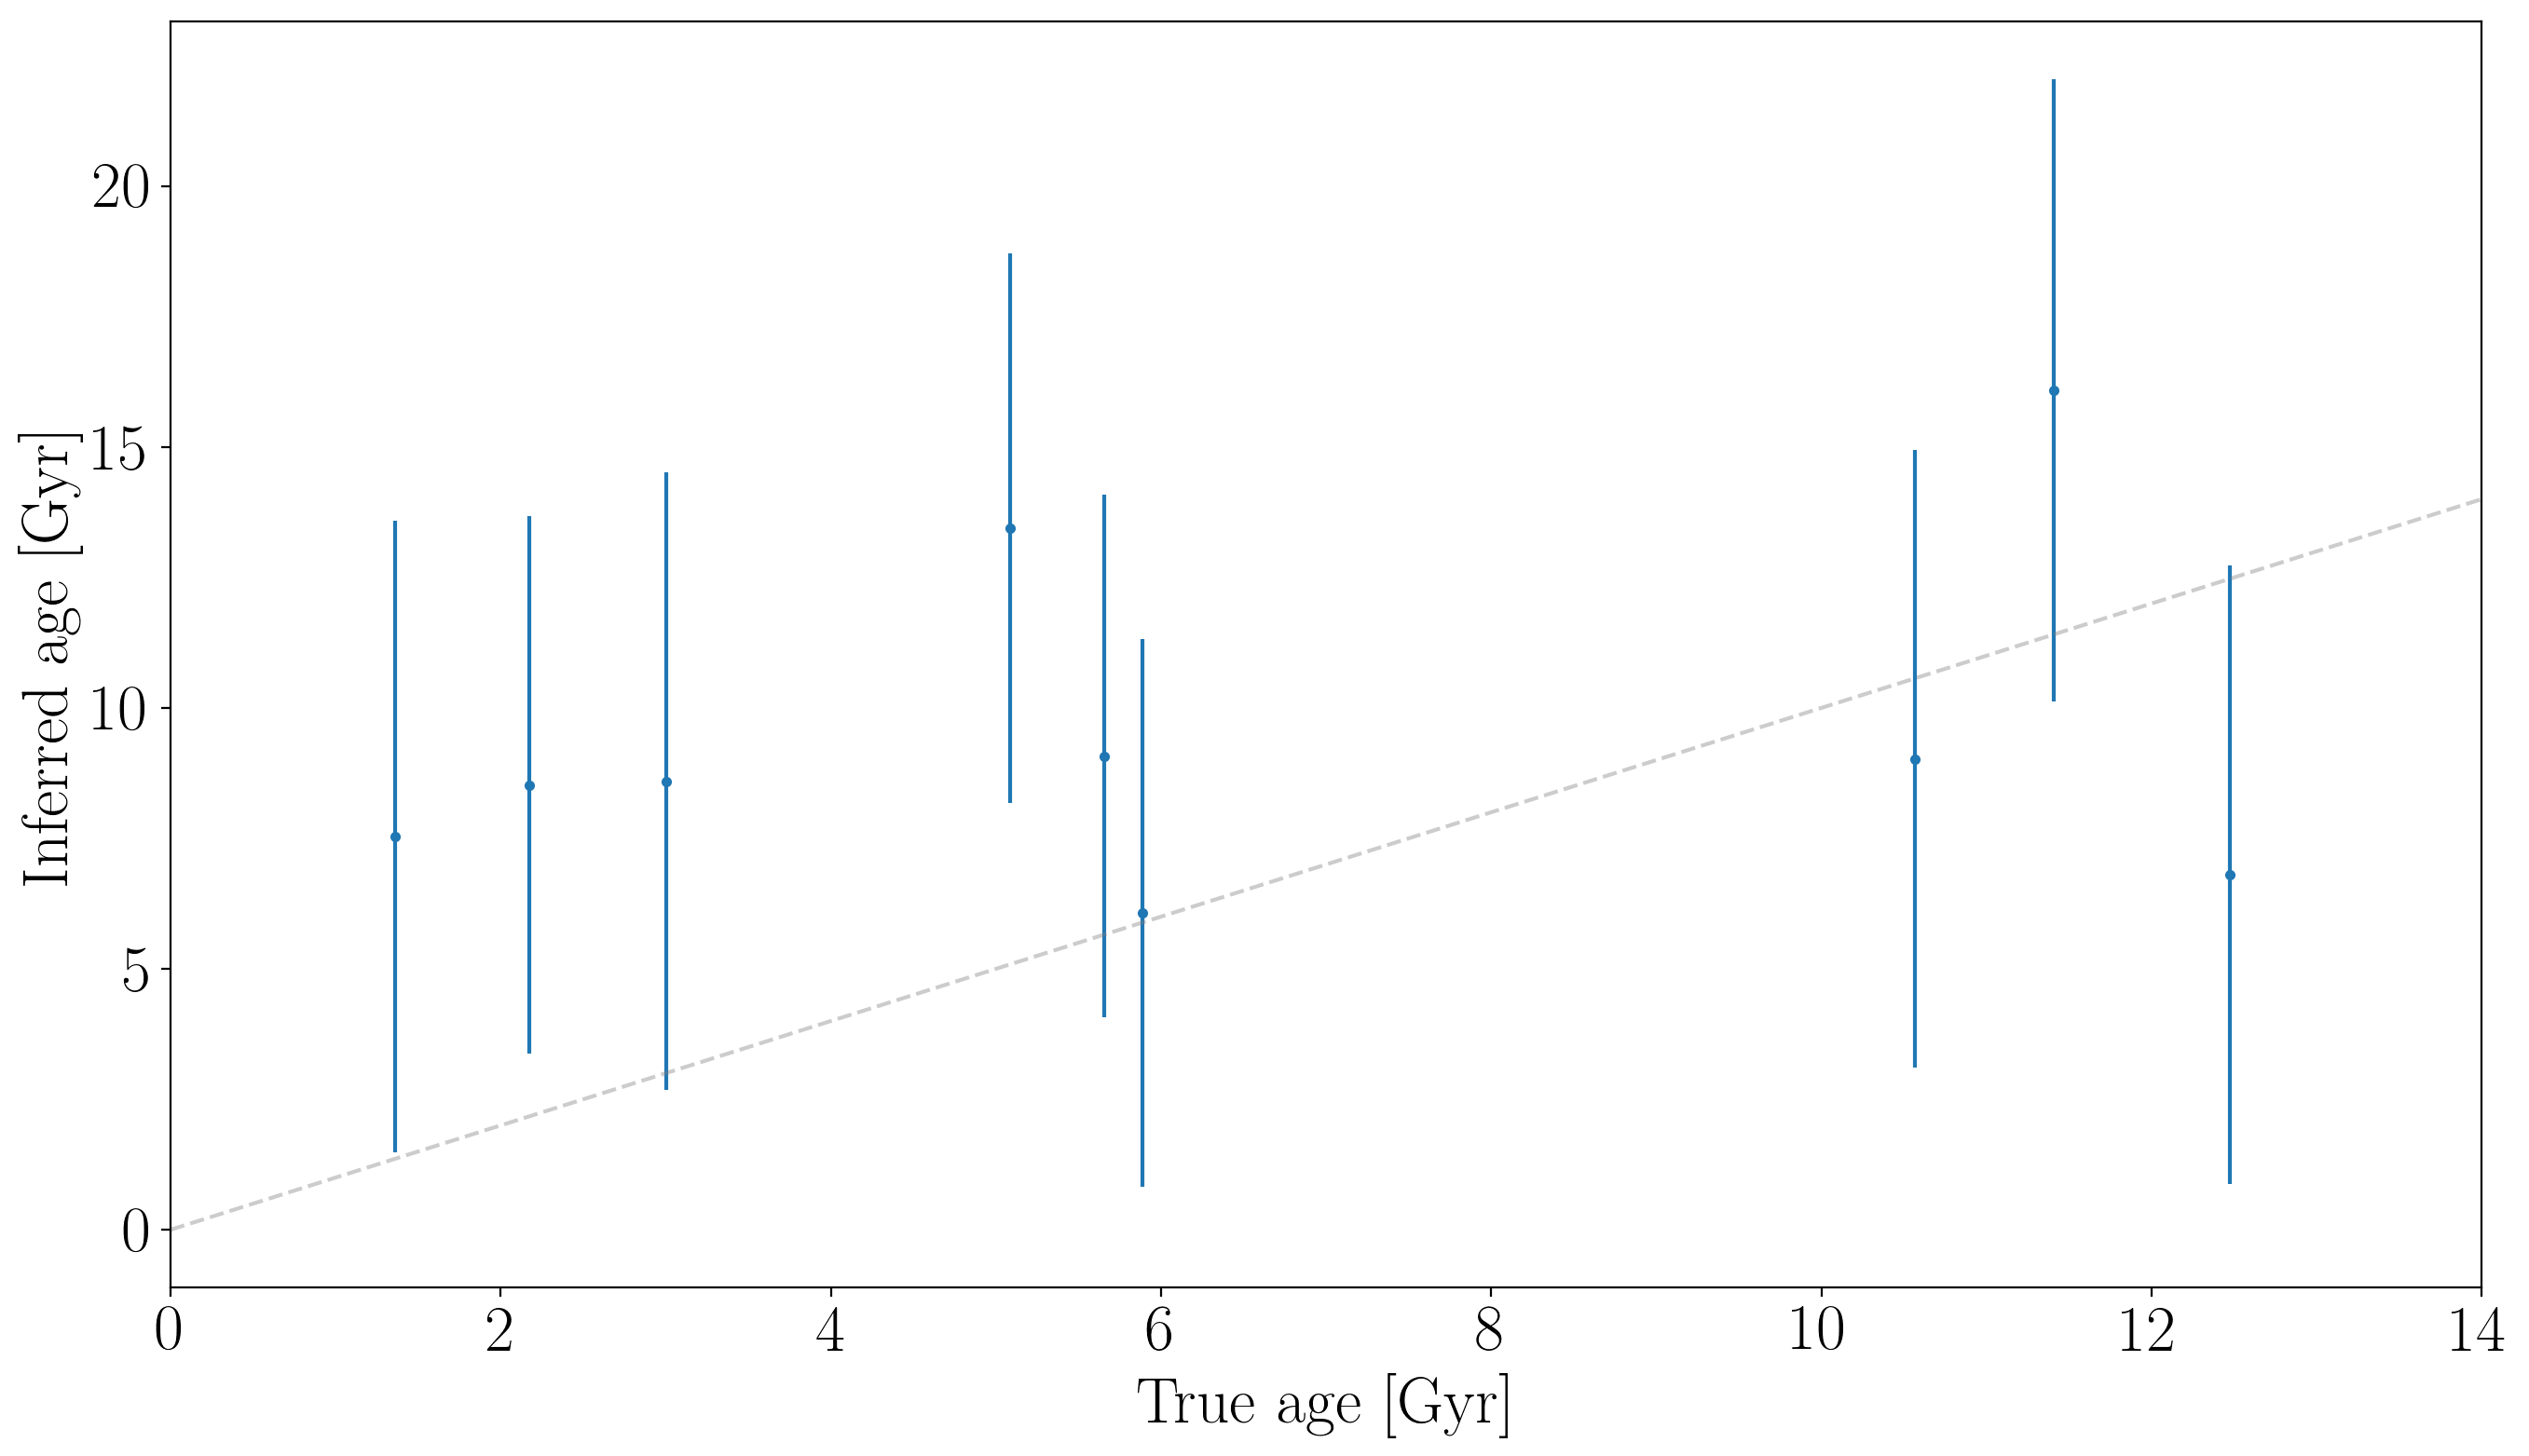

In [33]:
plt.figure(figsize=(16, 9), dpi=200)
# plt.errorbar((10**df.age.values[:N_iso])*1e-9, meds_iso, yerr=stds_iso, fmt=".")
plt.errorbar((10**df.age.values[:N_iso])*1e-9, meds_iso, yerr=stds_iso, fmt=".")
plt.xlabel("$\mathrm{True~age~[Gyr]}$")
plt.ylabel("$\mathrm{Inferred~age~[Gyr]}$")
xs = np.linspace(0, 14, 100)
plt.plot(xs, xs, ".5", ls="--", alpha=.4)
plt.xlim(0, 14)
#plt.savefig("iso_only.pdf")

(0, 14)

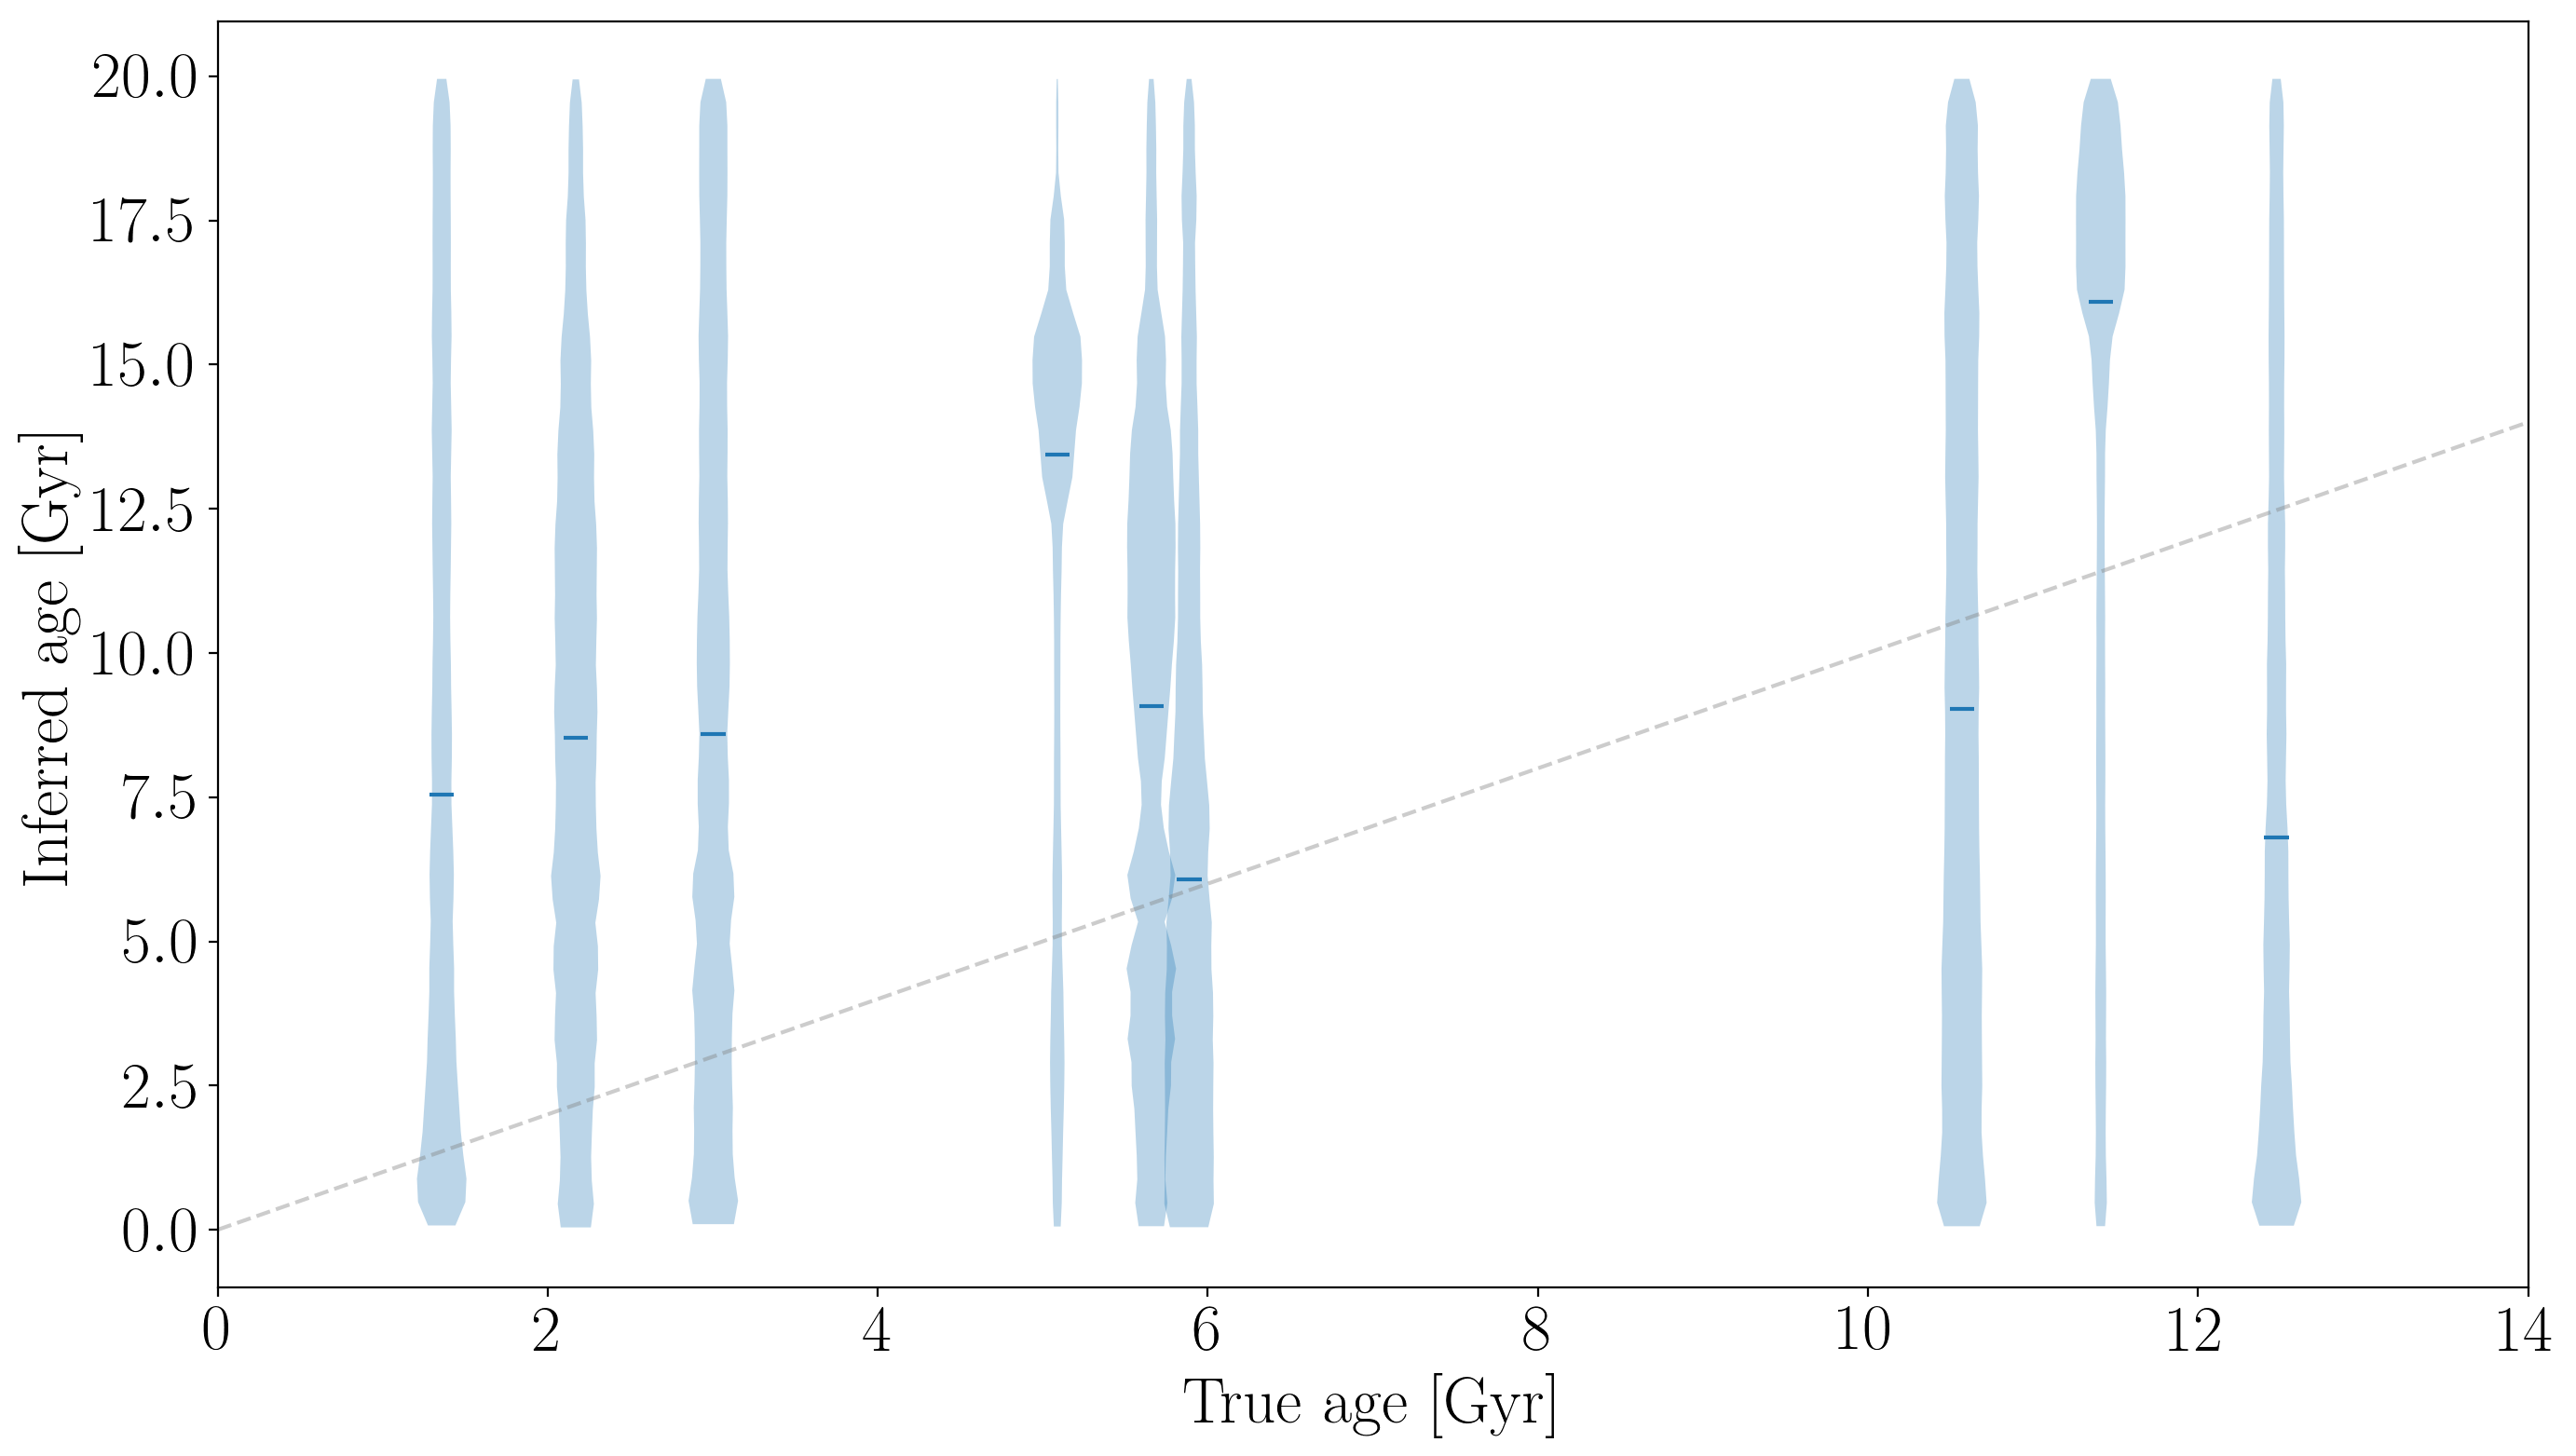

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 9), dpi=200)
mm = m[:N_iso]
axes.violinplot(age_samps_iso, true_age_gyr[:N_iso], points=50, widths=0.3,
                showmeans=False, showextrema=False, showmedians=True)
# axes.violinplot(age_samps_iso[mm], true_age_gyr[:N_iso][mm], points=50, widths=0.3, color="tab:orange",
#                 showmeans=False, showextrema=False, showmedians=False)
plt.xlabel("$\mathrm{True~age~[Gyr]}$")
plt.ylabel("$\mathrm{Inferred~age~[Gyr]}$")
xs = np.linspace(0, 14, 100)
plt.plot(xs, xs, ".5", ls="--", alpha=.4)
plt.xlim(0, 14)

Now just the gyrochronology model.

In [32]:
savedir = "simulation_results/gyro_only"
meds_gyro, stds_gyro = [], []
N = 80
for i in range(N):
    with h5py.File("{0}/{1}.h5".format(savedir, str(i).zfill(4)), "r") as f:
            samples = f["samples"][...]
            age_samps = (10**samples[:, 1])*1e-9
            meds_gyro.append(np.median(age_samps))
            stds_gyro.append(np.std(age_samps))

(0, 14)

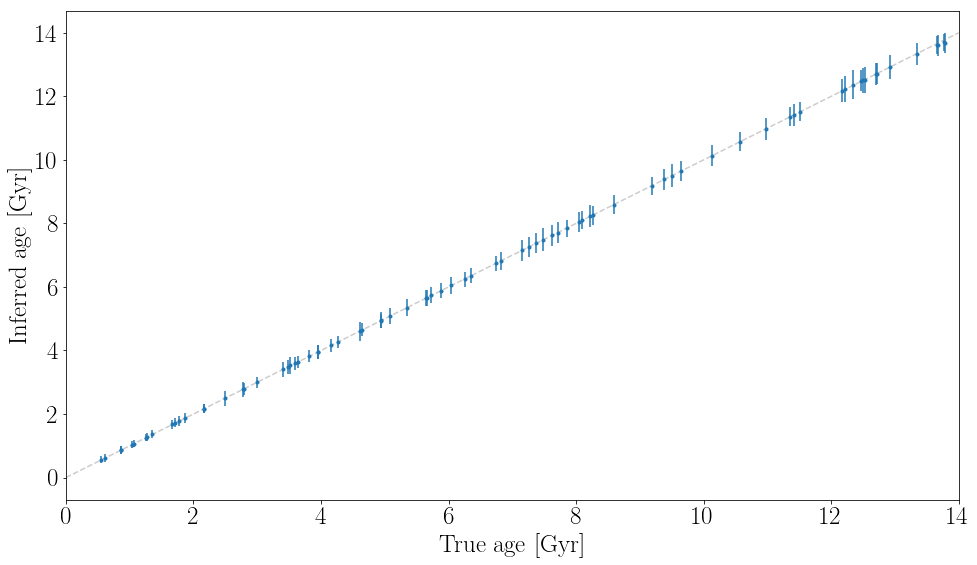

In [33]:
plt.figure(figsize=(16, 9))
plt.errorbar((10**df.age.values[:N])*1e-9, meds_gyro, yerr=stds_gyro, fmt=".")
plt.xlabel("$\mathrm{True~age~[Gyr]}$")
plt.ylabel("$\mathrm{Inferred~age~[Gyr]}$")
xs = np.linspace(0, 14, 100)
plt.plot(xs, xs, ".5", ls="--", alpha=.4)
plt.xlim(0, 14)